In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

In [3]:
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

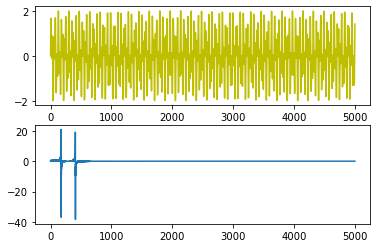

In [4]:
fig, axs = plt.subplots(2, 1)
axs = axs.reshape(-1)
axs[0].plot(y, color='y')
axs[1].plot(yt)
plt.show()

In [5]:
# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

In [6]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]
print(A.shape)

(500, 5000)


In [7]:
# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A@vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Feb 08 08:39:14 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) Feb 08 08:39:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 08 08:39:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 08 08:39:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 08 08:39:14 PM: Compiling problem (target solver=ECOS).
(CVXPY) Feb 08 08:39:14 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

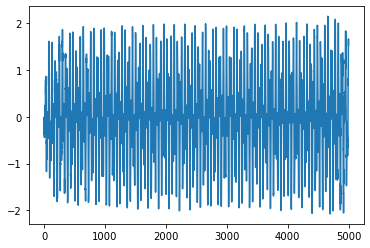

In [8]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)
plt.plot(sig)
plt.show()